In [1]:
import tikzplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

from constants import *

TO_TITLE = {
    'tput_mean': 'Throughput',
    'lat_mean': 'Latency',
    'neto_mean': 'Net. Usage',
    'cpu_max_avg': 'CPU Usage',
}


# Baseline Conditions

## Metrics

In [2]:
CSV_BL_SCALE = '/home/derick/eth1/emnet/data/results/bl_scale/compiled.csv'
CSV_BL_RATE = '/home/derick/eth1/emnet/data/results/bl_rate/compiled.csv'

designs = {
    'algo': {        
        'bhs': {'color': 'tab:blue', 'marker': 'o'},
        'ibft': {'color': 'tab:green', 'marker': '^'},
        'qbft': {'color': 'tab:orange', 'marker': 'x'}
    },
    'Name': {        
        'open': {'ls': 'solid'},
        'query': {'ls': 'dashed'},
        'transfer': {'ls': ':'}
    },
}

df_s = pd.read_csv(CSV_BL_SCALE)
df_r = pd.read_csv(CSV_BL_RATE)
ldf = [df_s, df_r]
df = pd.concat(ldf, ignore_index=True)

def get_grouped_df(df: pd.DataFrame):
    _df = df.copy().groupby(TEST_ID_COLS)

    df_out = _df[['Throughput (TPS)', 'neto_total_mb', 'Avg Latency (s)', 'cpu_max_all', 'cpu_max_avg_all']].agg(
        tput_max=('Throughput (TPS)', 'max'),
        tput_mean=('Throughput (TPS)', 'mean'),
        tput_all=('Throughput (TPS)', lambda x: list(x)),
        tput_std=('Throughput (TPS)', 'std'),
        neto_mean=('neto_total_mb', 'mean'),
        neto_all=('neto_total_mb', lambda x: list(x)),
        neto_std=('neto_total_mb', 'std'),
        lat_mean=('Avg Latency (s)', 'mean'),
        lat_all=('Avg Latency (s)', lambda x: list(x)),
        cpu_max_avg=('cpu_max_all', 'mean'),
        cpu_max_avg_avg=('cpu_max_avg_all', 'mean'),
    ).reset_index()

    return df_out

df_sg = get_grouped_df(df_s)
df_rg = get_grouped_df(df_r)
df_g = get_grouped_df(df)
df_g = df_g[df_g['tput_all'].map(len) >= 10]
df_g['cpu_max_avg'] = df_g['cpu_max_avg'].div(100)

(239.43162499999997, 271.075875)

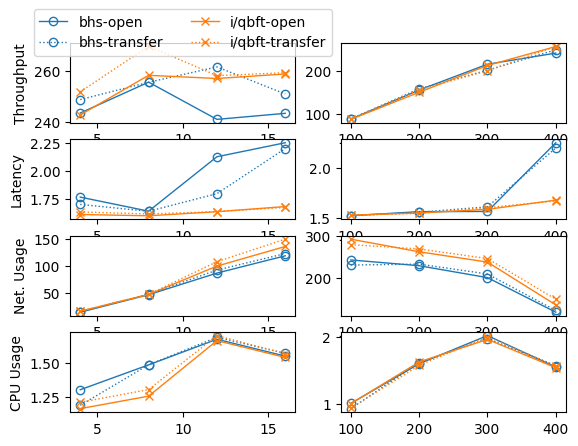

In [3]:
x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']
bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
fig, axs = plt.subplots(4, 2)
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
        axs[i][0].set_ylabel(TO_TITLE[y_col])
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']
bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )
axs[0][0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=2)
axs[0,0].get_ylim()

# Optional: convert and save as tikz file
# tikzplotlib.save("test.tex")

(-0.4635295, 17.8369395)

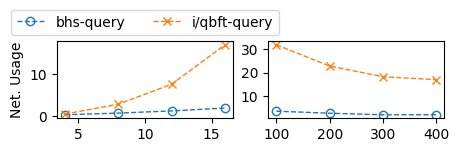

In [4]:
x_col = 'n'
y_cols = ['neto_mean']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']
bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
fig, axs = plt.subplots(1, 2, figsize=(5, 1))
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
        axs[0].set_ylabel(TO_TITLE[y_col])
    for key, grp in iq.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )

x_col = 'tps_param'
y_cols = ['neto_mean']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']
bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
    for key, grp in iq.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=2)
axs[0].get_ylim()

# Optional: convert and save as tikz file
# tikzplotlib.save("test.tex")

## Plotting $\Delta_{BHS}$

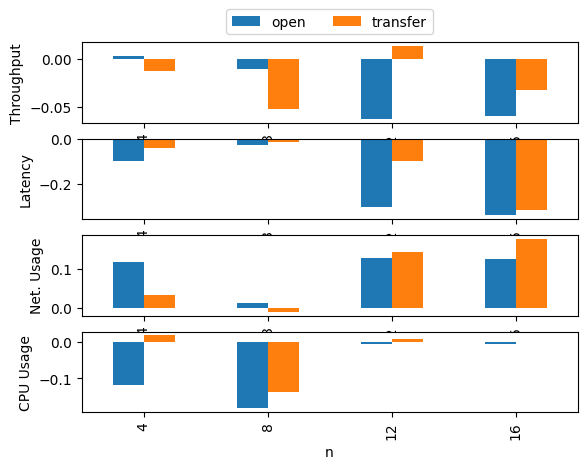

In [5]:
x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']

bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
    if y_col != 'tput_mean':
        df_cc.loc[:, (y_col, 'delta')] = -df_cc.loc[:, (y_col, 'delta')]
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

fig, axs = plt.subplots(4, 1)
for i, y_col in enumerate(y_cols):
    df_cc[y_col]['delta'][['open', 'transfer']].plot.bar(
        ax=axs[i], legend=False, linewidth=1, ylabel=TO_TITLE[y_col]
    )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=3)

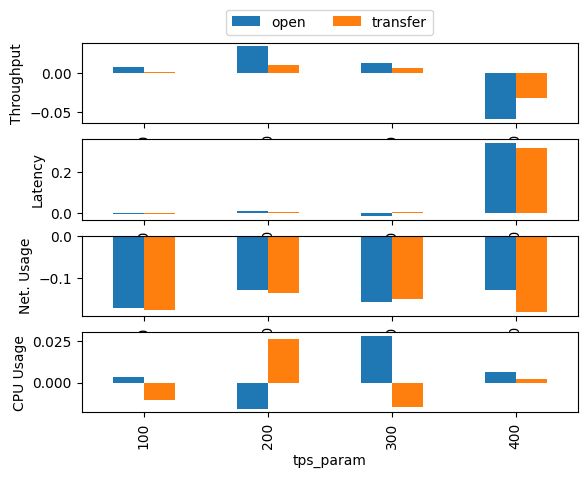

In [6]:
x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']

bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

fig, axs = plt.subplots(4, 1)
for i, y_col in enumerate(y_cols):
    df_cc[y_col]['delta'][['open', 'transfer']].plot.bar(
        ax=axs[i], legend=False, linewidth=1, ylabel=TO_TITLE[y_col]
    )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=3)

# Delay-Added Conditions

## Metrics

In [7]:
CSV_SCALE = '/home/derick/eth1/emnet/data/results/delay_scale/compiled.csv'
CSV_RATE = '/home/derick/eth1/emnet/data/results/delay_rate/compiled.csv'

df_s = pd.read_csv(CSV_SCALE)
df_r = pd.read_csv(CSV_RATE)
df_sb = pd.read_csv(CSV_BL_SCALE)
df_rb = pd.read_csv(CSV_BL_RATE)

def get_grouped_df(df: pd.DataFrame):
    _df = df.copy().groupby(TEST_ID_COLS)

    df_out = _df[['Throughput (TPS)', 'neto_total_mb', 'Avg Latency (s)', 'cpu_max_all', 'cpu_max_avg_all']].agg(
        tput_max=('Throughput (TPS)', 'max'),
        tput_mean=('Throughput (TPS)', 'mean'),
        tput_all=('Throughput (TPS)', lambda x: list(x)),
        tput_std=('Throughput (TPS)', 'std'),
        neto_mean=('neto_total_mb', 'mean'),
        neto_all=('neto_total_mb', lambda x: list(x)),
        neto_std=('neto_total_mb', 'std'),
        lat_mean=('Avg Latency (s)', 'mean'),
        lat_all=('Avg Latency (s)', lambda x: list(x)),
        cpu_max_avg=('cpu_max_all', 'mean'),
        cpu_max_avg_avg=('cpu_max_avg_all', 'mean'),
    ).reset_index()

    return df_out

df_sg = get_grouped_df(df_s)
df_rg = get_grouped_df(df_r)
df_sbg = get_grouped_df(df_sb)
df_rbg = get_grouped_df(df_rb)
df_g = get_grouped_df(df)
df_g = df_g[df_g['tput_all'].map(len) >= 10]
df_g['cpu_max_avg'] = df_g['cpu_max_avg'].div(100)

(157.281, 257.79900000000004)

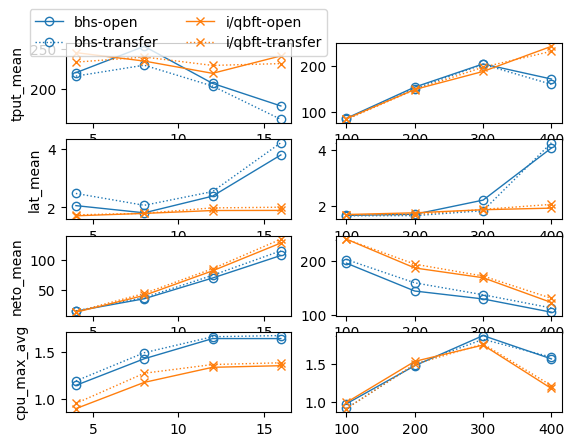

In [8]:
x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']
bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
fig, axs = plt.subplots(4, 2)
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
        axs[i][0].set_ylabel(y_col)
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']
bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )
axs[0][0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=2)
axs[0,0].get_ylim()

# Optional
# tikzplotlib.save("test.tex")

## Plotting $\Delta_{BHS}$

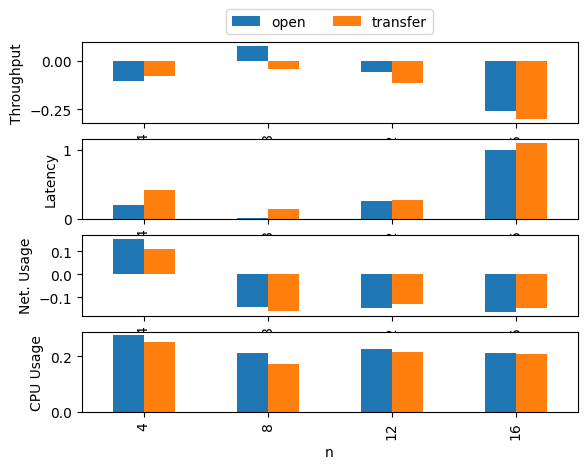

In [9]:
x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']

bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

fig, axs = plt.subplots(4, 1)
for i, y_col in enumerate(y_cols):
    df_cc[y_col]['delta'][['open', 'transfer']].plot.bar(
        ax=axs[i], legend=False, linewidth=1, ylabel=TO_TITLE[y_col]
    )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=3)

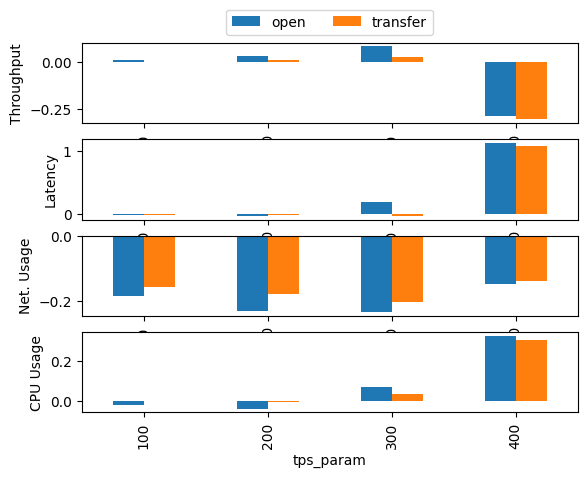

In [10]:
x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']

bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

fig, axs = plt.subplots(4, 1)
for i, y_col in enumerate(y_cols):
    df_cc[y_col]['delta'][['open', 'transfer']].plot.bar(
        ax=axs[i], legend=False, linewidth=1, ylabel=TO_TITLE[y_col]
    )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=3)

## Comparing $\Delta_{BHS}$ with Baseline

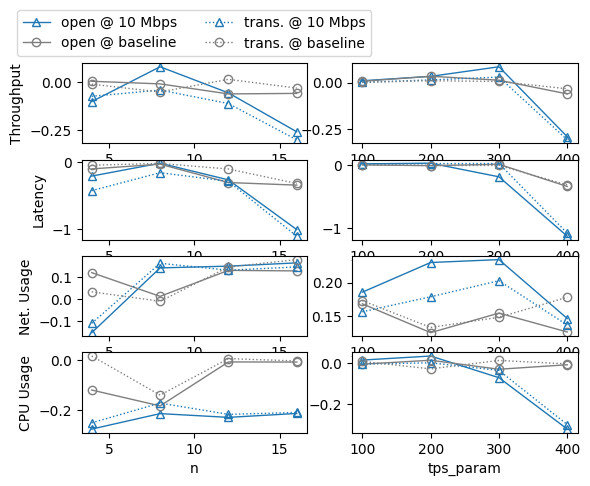

In [11]:
designs = {
    'type': {        
        'baseline': {'color': 'tab:gray', 'marker': 'o'},
        'delay': {'color': 'tab:blue', 'marker': '^'}
    },
    'Name': {        
        'open': {'ls': 'solid'},
        'query': {'ls': 'dashed'},
        'transfer': {'ls': ':'}
    },
}

x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']

bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc.loc[:, (y_col, 'delta')] = -df_cc.loc[:, (y_col, 'delta')]
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']

bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc2.columns = df_cc2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc2.loc[:, (y_col, 'delta')] = (
        df_cc2[y_col]['bhs'] - df_cc2[y_col]['iq']
    ) / df_cc2[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc2.loc[:, (y_col, 'delta')] = -df_cc2.loc[:, (y_col, 'delta')]
df_cc2.sort_index(axis=1, level=0, inplace=True)
df_cc2 = df_cc2.unstack(-1)


x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sbg.loc[df_sbg['algo'] != 'bhs']

bhs = df_sbg[df_sbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb.columns = df_ccb.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_ccb.loc[:, (y_col, 'delta')] = (
        df_ccb[y_col]['bhs'] - df_ccb[y_col]['iq']
    ) / df_ccb[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb.loc[:, (y_col, 'delta')] = -df_ccb.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb.sort_index(axis=1, level=0, inplace=True)
df_ccb = df_ccb.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rbg.loc[df_rbg['algo'] != 'bhs']

bhs = df_rbg[df_rbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb2.columns = df_ccb2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_ccb2.loc[:, (y_col, 'delta')] = (
        df_ccb2[y_col]['bhs'] - df_ccb2[y_col]['iq']
    ) / df_ccb2[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb2.loc[:, (y_col, 'delta')] = -df_ccb2.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb2.sort_index(axis=1, level=0, inplace=True)
df_ccb2 = df_ccb2.unstack(-1)

fig, axs = plt.subplots(4, 2)
for i, y_col in enumerate(y_cols):
    for txn in ['open', 'transfer']:
        df_cc[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            ylabel=TO_TITLE[y_col],
            **({**designs['type']['delay'], **designs['Name'][txn]})
        )
        df_cc2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['delay'], **designs['Name'][txn]})
        )
        df_ccb[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
        df_ccb2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
axs[0][0].legend([
    'open @ 10 Mbps',
    'open @ baseline',
    'trans. @ 10 Mbps',
    'trans. @ baseline',
], loc='upper center', bbox_to_anchor=(0.5,1.75), ncol=2)

In [12]:
df_cc

cpu_max_avg                                                           
             bhs                      delta                           iq   
Name        open   query transfer      open     query  transfer     open   
n                                                                          
4        114.694  17.149  119.380 -0.275143  0.553144 -0.250026   89.946  \
8        142.971  74.107  149.377 -0.213151 -0.886010 -0.170896  117.851   
12       164.432  25.127  166.400 -0.228214 -0.351641 -0.216125  133.879   
16       164.419  26.831  167.613 -0.212538 -0.125320 -0.208518  135.599   

                      lat_mean  ... neto_mean tput_mean                    
                           bhs  ...        iq       bhs                    
Name   query transfer     open  ...  transfer      open   query transfer   
n                               ...                                        
4     38.377   95.502    2.064  ...    12.773    220.22  391.35   215.98  \
8     39.293  127.575    1.817  ...    43.729    253.23  390.81   229.63   
12    18.590  136.828    2.389  ...    85.554    206.89  390.99   203.52   
16    23.843  138.693    3.804  ...   135.651    178.64  390.27   161.85   

                                                             
         delta                          iq                   
Name      open     query  transfer    open   query transfer  
n                                                            
4    -0.102425 -0.001785 -0.074834  245.35  392.05   233.45  
8     0.078492  0.000179 -0.042610  234.80  390.74   239.85  
12   -0.057277  0.000870 -0.112584  219.46  390.65   229.34  
16   -0.259554 -0.000231 -0.301256  241.26  390.36   231.63  

[4 rows x 36 columns]

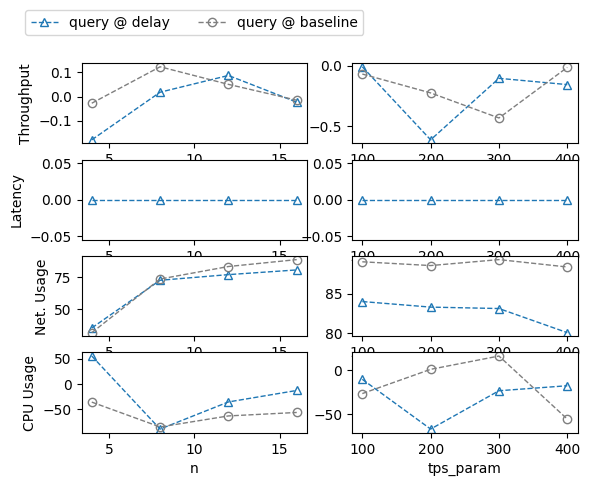

In [13]:
designs = {
    'type': {        
        'baseline': {'color': 'tab:gray', 'marker': 'o'},
        'delay': {'color': 'tab:blue', 'marker': '^'}
    },
    'Name': {        
        'open': {'ls': 'solid'},
        'query': {'ls': 'dashed'},
        'transfer': {'ls': ':'}
    },
}

x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']

bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_cc.loc[:, (y_col, 'delta')] = 100 * (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc.loc[:, (y_col, 'delta')] = -df_cc.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']

bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc2.columns = df_cc2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc2.loc[:, (y_col, 'delta')] = 100 * (
        df_cc2[y_col]['bhs'] - df_cc2[y_col]['iq']
    ) / df_cc2[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc2.loc[:, (y_col, 'delta')] = -df_cc2.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc2.sort_index(axis=1, level=0, inplace=True)
df_cc2 = df_cc2.unstack(-1)

x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sbg.loc[df_sbg['algo'] != 'bhs']

bhs = df_sbg[df_sbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb.columns = df_ccb.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_ccb.loc[:, (y_col, 'delta')] = 100 * (
        df_ccb[y_col]['bhs'] - df_ccb[y_col]['iq']
    ) / df_ccb[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb.loc[:, (y_col, 'delta')] = -df_ccb.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb.sort_index(axis=1, level=0, inplace=True)
df_ccb = df_ccb.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rbg.loc[df_rbg['algo'] != 'bhs']

bhs = df_rbg[df_rbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb2.columns = df_ccb2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_ccb2.loc[:, (y_col, 'delta')] = 100 * (
        df_ccb2[y_col]['bhs'] - df_ccb2[y_col]['iq']
    ) / df_ccb2[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb2.loc[:, (y_col, 'delta')] = -df_ccb2.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb2.sort_index(axis=1, level=0, inplace=True)
df_ccb2 = df_ccb2.unstack(-1)

fig, axs = plt.subplots(4, 2)
for i, y_col in enumerate(y_cols):
    for txn in ['query']:
        df_cc[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            ylabel=TO_TITLE[y_col],
            **({**designs['type']['delay'], **designs['Name'][txn]})
        )
        df_cc2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['delay'], **designs['Name'][txn]})
        )
        df_ccb[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
        df_ccb2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
axs[0][0].legend([
    'query @ delay',
    'query @ baseline',
], loc='upper center', bbox_to_anchor=(0.5,1.75), ncol=2)

In [14]:
df_cc

cpu_max_avg                                                              
             bhs                       delta                             iq   
Name        open   query transfer       open      query   transfer     open   
n                                                                             
4        114.694  17.149  119.380 -27.514286  55.314381 -25.002618   89.946  \
8        142.971  74.107  149.377 -21.315050 -88.601023 -17.089555  117.851   
12       164.432  25.127  166.400 -22.821354 -35.164067 -21.612535  133.879   
16       164.419  26.831  167.613 -21.253844 -12.531980 -20.851809  135.599   

                      lat_mean  ... neto_mean tput_mean                    
                           bhs  ...        iq       bhs                    
Name   query transfer     open  ...  transfer      open   query transfer   
n                               ...                                        
4     38.377   95.502    2.064  ...    12.773    220.22  391.35   215.98  \
8     39.293  127.575    1.817  ...    43.729    253.23  390.81   229.63   
12    18.590  136.828    2.389  ...    85.554    206.89  390.99   203.52   
16    23.843  138.693    3.804  ...   135.651    178.64  390.27   161.85   

                                                               
          delta                           iq                   
Name       open     query   transfer    open   query transfer  
n                                                              
4    -10.242511 -0.178549  -7.483401  245.35  392.05   233.45  
8      7.849233  0.017915  -4.260996  234.80  390.74   239.85  
12    -5.727695  0.087034 -11.258394  219.46  390.65   229.34  
16   -25.955401 -0.023056 -30.125631  241.26  390.36   231.63  

[4 rows x 36 columns]

# Bandwidth-Limited Conditions

In [15]:
CSV_BW400 = '/home/derick/eth1/emnet/data/results/bw_400/compiled.csv'
CSV_BW200 = '/home/derick/eth1/emnet/data/results/bw_200/compiled.csv'
df_bw400 = pd.read_csv(CSV_BW400)
df_bw200 = pd.read_csv(CSV_BW200)
ldf = [df_bw400, df_bw200]
df = pd.concat(ldf, ignore_index=True)

def get_grouped_df(df: pd.DataFrame):
    _df = df.copy().groupby(TEST_ID_COLS)

    df_out = _df[['Throughput (TPS)', 'neto_total_mb', 'Avg Latency (s)', 'cpu_max_all', 'cpu_max_avg_all']].agg(
        tput_max=('Throughput (TPS)', 'max'),
        tput_mean=('Throughput (TPS)', 'mean'),
        tput_all=('Throughput (TPS)', lambda x: list(x)),
        tput_std=('Throughput (TPS)', 'std'),
        neto_mean=('neto_total_mb', 'mean'),
        neto_all=('neto_total_mb', lambda x: list(x)),
        neto_std=('neto_total_mb', 'std'),
        lat_mean=('Avg Latency (s)', 'mean'),
        lat_all=('Avg Latency (s)', lambda x: list(x)),
        cpu_max_avg=('cpu_max_all', 'mean'),
        cpu_max_avg_avg=('cpu_max_avg_all', 'mean'),
    ).reset_index()

    return df_out

df_bw400g = get_grouped_df(df_bw400)
df_bw200g = get_grouped_df(df_bw200)
df_g = get_grouped_df(df)
df_g = df_g[df_g['tput_all'].map(len) >= 10]
df_g['cpu_max_avg'] = df_g['cpu_max_avg'].div(100)

## BW Limit @ 400 TPS

### Plotting Metrics

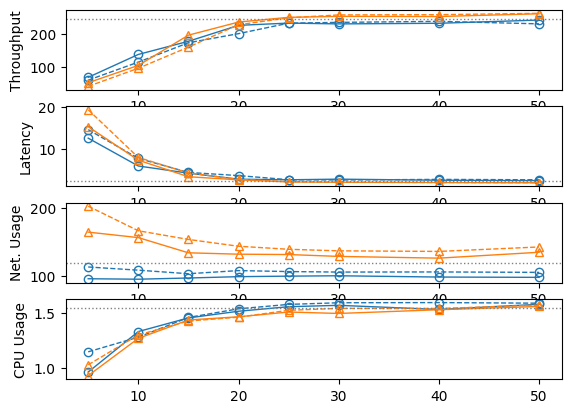

In [16]:
designs = {
    'algo': {        
        'bhs': {'color': 'tab:blue', 'marker': 'o'},
        'ibft': {'color': 'tab:green', 'marker': 'x'},
        'qbft': {'color': 'tab:orange', 'marker': '^'}
    },
    'Name': {        
        'open': {'ls': 'solid'},
        'query': {'ls': 'dashed'},
        'transfer': {'ls': 'dashed'}
    },
}

df_bhs = (df_g[df_g['algo'] == 'bhs']).copy()
df_iq = (df_g[df_g['algo'] != 'bhs']).copy()

fig, axs = plt.subplots(4, 1)
x_col = 'rate_limit'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['rate_limit', 'Name']
df_others = df_bw400g.loc[df_bw400g['algo'] != 'bhs']
bhs = df_bw400g[df_bw400g['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
        axs[i].set_ylabel(TO_TITLE[y_col])
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
       )
axs[0].axhline(y=243.25, color='gray', linestyle=':', lw=1)
axs[1].axhline(y=2.19, color='gray', linestyle=':', lw=1)
axs[2].axhline(y=119.48, color='gray', linestyle=':', lw=1)
axs[3].axhline(y=1.55, color='gray', linestyle=':', lw=1)

### Plotting $\Delta_{BHS}$

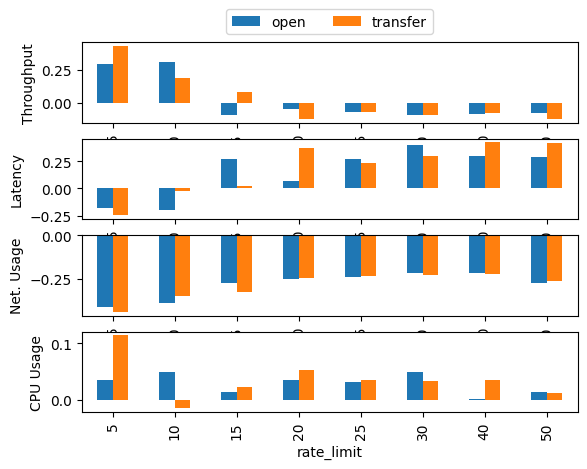

In [17]:
x_col = 'rate_limit'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['rate_limit', 'Name']
df_others = df_bw400g.loc[df_bw400g['algo'] != 'bhs']

bhs = df_bw400g[df_bw400g['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

fig, axs = plt.subplots(4, 1)
for i, y_col in enumerate(y_cols):
    df_cc[y_col]['delta'][['open', 'transfer']].plot.bar(
        ax=axs[i], legend=False, linewidth=1, ylabel=TO_TITLE[y_col]
    )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=3)

## BW Limit @ 200 TPS

### Plotting Metrics

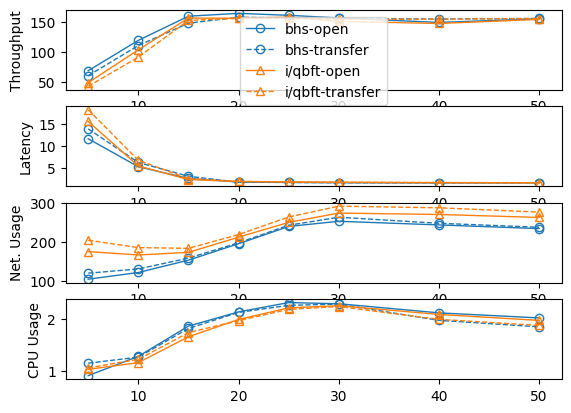

In [18]:
fig, axs = plt.subplots(4, 1)
x_col = 'rate_limit'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['rate_limit', 'Name']
df_others = df_bw200g.loc[df_bw200g['algo'] != 'bhs']
bhs = df_bw200g[df_bw200g['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
        axs[i].set_ylabel(TO_TITLE[y_col])
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
       )
axs[0].legend()

### Plotting $\Delta_{BHS}$ (vs. 400 TPS)

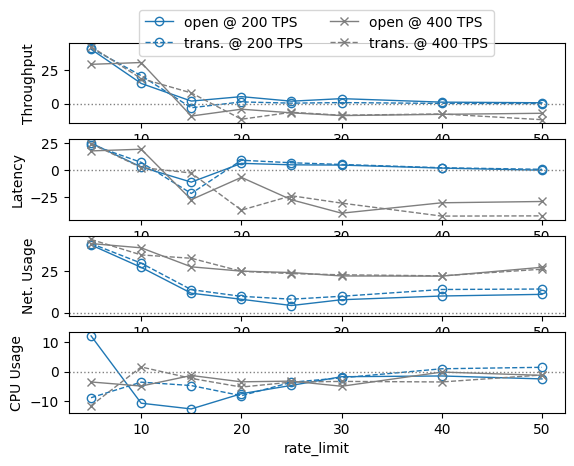

In [19]:
designs = {
    'bw': {        
        '200': {'color': 'tab:blue', 'marker': 'o'},
        '400': {'color': 'tab:gray', 'marker': 'x'},
    },
    'Name': {        
        'open': {'ls': 'solid'},
        'query': {'ls': 'dashed'},
        'transfer': {'ls': 'dashed'}
    },
}

x_col = 'rate_limit'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['rate_limit', 'Name']
df_others = df_bw200g.loc[df_bw200g['algo'] != 'bhs']

bhs = df_bw200g[df_bw200g['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_cc.loc[:, (y_col, 'delta')] = 100 * (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc.loc[:, (y_col, 'delta')] = -df_cc.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)
df_others = df_bw400g.loc[df_bw400g['algo'] != 'bhs']

bhs = df_bw400g[df_bw400g['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc2.columns = df_cc2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc2.loc[:, (y_col, 'delta')] = 100 * (
        df_cc2[y_col]['bhs'] - df_cc2[y_col]['iq']
    ) / df_cc2[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc2.loc[:, (y_col, 'delta')] = -df_cc2.loc[:, (y_col, 'delta')]
df_cc2.sort_index(axis=1, level=0, inplace=True)
df_cc2 = df_cc2.unstack(-1)

fig, axs = plt.subplots(4, 1)
for i, y_col in enumerate(y_cols):
    df_cc[y_col]['delta']['open'].plot.line(
        ax=axs[i], legend=False, linewidth=1,
        markerfacecolor='none',
        ylabel=TO_TITLE[y_col],
        **({**designs['bw']['200'], **designs['Name']['open']})
    )
    df_cc[y_col]['delta']['transfer'].plot.line(
        ax=axs[i], legend=False, linewidth=1,
            markerfacecolor='none',
        **({**designs['bw']['200'], **designs['Name']['transfer']})
    )
    df_cc2[y_col]['delta']['open'].plot.line(
        ax=axs[i], legend=False, linewidth=1,
            markerfacecolor='none',
        **({**designs['bw']['400'], **designs['Name']['open']})
    )
    df_cc2[y_col]['delta']['transfer'].plot.line(
        ax=axs[i], legend=False, linewidth=1,
            markerfacecolor='none',
        **({**designs['bw']['400'], **designs['Name']['transfer']})
    )

axs[0].axhline(y=0, color='gray', linestyle='dotted', lw=1)
axs[1].axhline(y=0, color='gray', linestyle='dotted', lw=1)
axs[2].axhline(y=0, color='gray', linestyle='dotted', lw=1)
axs[3].axhline(y=0, color='gray', linestyle='dotted', lw=1)


axs[0].legend([
    'open @ 200 TPS',
    'trans. @ 200 TPS',
    'open @ 400 TPS',
    'trans. @ 400 TPS',
], loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=2)

In [20]:
df_cc

cpu_max_avg                                                          
                   bhs                             delta                        
Name              open      query    transfer       open      query  transfer   
rate_limit                                                                      
5            90.026667  19.840000  114.346667  12.028351  34.805468 -8.777270  \
10          127.731000  26.391000  126.233000 -10.632714   1.038698 -3.545209   
15          186.938182  23.389091  182.312727 -12.559117  -5.928854 -4.690789   
20          214.800000  25.296000  213.792000  -7.442977  -9.336100 -8.106796   
25          233.040000  29.952000  227.616000  -4.633621 -24.550898 -3.582350   
30          230.784000  19.872000  230.016000  -1.713560  14.639175 -2.087772   
40          212.880000  19.632000  198.288000  -1.464196   7.882883  0.959003   
50          203.006364  18.994545  185.522727  -2.453955  21.948778  1.451891   

                                       lat_mean  ... neto_mean   tput_mean   
                 iq                         bhs  ...        iq         bhs   
Name           open   query transfer       open  ...  transfer        open   
rate_limit                                       ...                         
5           102.336  30.432  105.120  11.616667  ...   204.174   69.100000  \
10          115.455  26.668  121.911   5.237000  ...   185.110  119.820000   
15          166.080  22.080  174.144   2.550000  ...   183.250  160.245455   
20          199.920  23.136  197.760   1.737000  ...   218.700  165.080000   
25          222.720  24.048  219.744   1.656000  ...   263.950  161.770000   
30          226.896  23.280  225.312   1.590000  ...   291.960  157.360000   
40          209.808  21.312  200.208   1.569000  ...   287.770  149.840000   
50          198.144  24.336  188.256   1.563636  ...   276.690  155.954545   

                                                                             
                                        delta                           iq   
Name             query    transfer       open     query   transfer    open   
rate_limit                                                                   
5           200.244444   60.744444  40.847941 -0.132440  41.628455   49.06  \
10          199.490000  111.160000  15.178314 -0.225068  21.036585  104.03   
15          200.200000  148.581818   1.937312 -0.094815  -3.077744  157.20   
20          199.810000  158.600000   5.273898 -0.334198   1.309486  156.81   
25          200.210000  157.390000   1.857449 -0.044933   0.382677  158.82   
30          200.320000  156.460000   3.772092  0.044948   0.798866  151.64   
40          200.060000  155.580000   1.147563 -0.139762   0.186747  148.14   
50          200.418182  156.536364   0.674292  0.128988   0.067994  154.91   

                             
                             
Name         query transfer  
rate_limit                   
5           200.51    42.89  
10          199.94    91.84  
15          200.39   153.30  
20          200.48   156.55  
25          200.30   156.79  
30          200.23   155.22  
40          200.34   155.29  
50          200.16   156.43  

[8 rows x 36 columns]

## BW Limit @ 10 Mbps

### Plotting Metrics

In [21]:
CSV_SCALE = '/home/derick/eth1/emnet/data/results/bw_scale/compiled.csv'
CSV_RATE = '/home/derick/eth1/emnet/data/results/bw_rate/compiled.csv'

df_s = pd.read_csv(CSV_SCALE)
df_r = pd.read_csv(CSV_RATE)
df_sb = pd.read_csv(CSV_BL_SCALE)
df_rb = pd.read_csv(CSV_BL_RATE)
ldf = [df_s, df_r]
df = pd.concat(ldf, ignore_index=True)

def get_grouped_df(df: pd.DataFrame):
    _df = df.copy().groupby(TEST_ID_COLS)

    df_out = _df[['Throughput (TPS)', 'neto_total_mb', 'Avg Latency (s)', 'cpu_max_all', 'cpu_max_avg_all']].agg(
        tput_max=('Throughput (TPS)', 'max'),
        tput_mean=('Throughput (TPS)', 'mean'),
        tput_all=('Throughput (TPS)', lambda x: list(x)),
        tput_std=('Throughput (TPS)', 'std'),
        neto_mean=('neto_total_mb', 'mean'),
        neto_all=('neto_total_mb', lambda x: list(x)),
        neto_std=('neto_total_mb', 'std'),
        lat_mean=('Avg Latency (s)', 'mean'),
        lat_all=('Avg Latency (s)', lambda x: list(x)),
        cpu_max_avg=('cpu_max_all', 'mean'),
        cpu_max_avg_avg=('cpu_max_avg_all', 'mean'),
    ).reset_index()

    return df_out

df_sg = get_grouped_df(df_s)
df_rg = get_grouped_df(df_r)
df_sbg = get_grouped_df(df_sb)
df_rbg = get_grouped_df(df_rb)
df_g = get_grouped_df(df)
df_g = df_g[df_g['tput_all'].map(len) >= 10]
df_g['cpu_max_avg'] = df_g['cpu_max_avg'].div(100)

(92.525, 258.95500000000004)

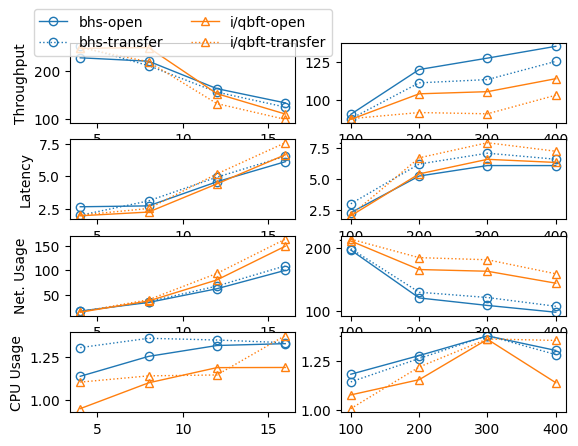

In [22]:
designs = {
    'algo': {        
        'bhs': {'color': 'tab:blue', 'marker': 'o'},
        'ibft': {'color': 'tab:green', 'marker': 'x'},
        'qbft': {'color': 'tab:orange', 'marker': '^'}
    },
    'Name': {        
        'open': {'ls': 'solid'},
        'query': {'ls': 'dashed'},
        'transfer': {'ls': ':'}
    },
}

x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']
bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
fig, axs = plt.subplots(4, 2)
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
        axs[i][0].set_ylabel(TO_TITLE[y_col])
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']
bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
    for key, grp in iq.groupby(['Name']):
        if key[0] == 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[i][1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )
axs[0][0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=2)
axs[0,0].get_ylim()

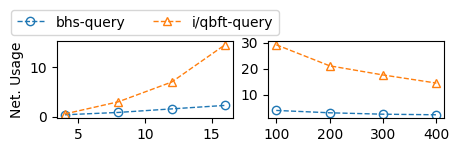

In [23]:
x_col = 'n'
y_cols = ['neto_mean']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']
bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
fig, axs = plt.subplots(1, 2, figsize=(5,1))
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
        axs[0].set_ylabel(TO_TITLE[y_col])
    for key, grp in iq.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[0].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )

x_col = 'tps_param'
y_cols = ['neto_mean']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']
bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
iq = iq.swaplevel(0, 1, axis=0)
bhs = bhs.reset_index(level=[0,1])
iq = iq.reset_index(level=[0,1])
for i, y_col in enumerate(y_cols):
    for key, grp in bhs.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'bhs-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['bhs'], **designs['Name'][key[0]]})
        )
    for key, grp in iq.groupby(['Name']):
        if key[0] != 'query':
            continue
        if y_col == 'cpu_max_avg':
            grp[y_col] = grp[y_col] / 100
        axs[1].plot(
            grp[x_col].values,
            grp[y_col].values,
            label=f'i/qbft-{key[0]}',
            linewidth=1,
            markerfacecolor='none',
            **({**designs['algo']['qbft'], **designs['Name'][key[0]]})
        )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=2)
axs[0].get_ylim()

tikzplotlib.save("_test.tex")

### Plotting $\Delta_{BHS}$

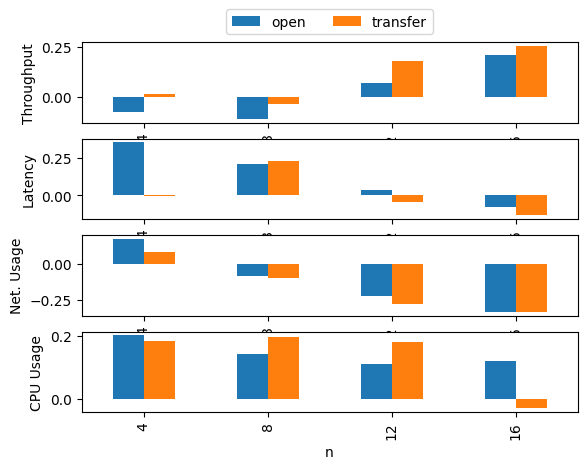

In [24]:
x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']

bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

fig, axs = plt.subplots(4, 1)
for i, y_col in enumerate(y_cols):
    df_cc[y_col]['delta'][['open', 'transfer']].plot.bar(
        ax=axs[i], legend=False, linewidth=1, ylabel=TO_TITLE[y_col],
    )
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.5), ncol=3)


### Comparing $\Delta_{BHS}$ against Baseline

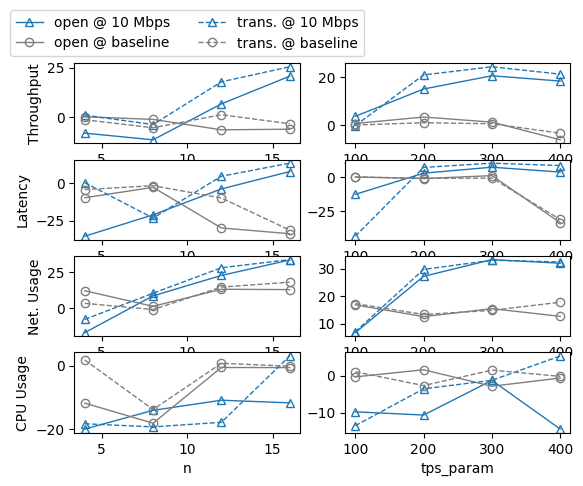

In [25]:
designs = {
    'type': {        
        'baseline': {'color': 'tab:gray', 'marker': 'o'},
        'bw': {'color': 'tab:blue', 'marker': '^'}
    },
    'Name': {        
        'open': {'ls': 'solid'},
        'query': {'ls': 'dashed'},
        'transfer': {'ls': 'dashed'}
    },
}

x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']

bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_cc.loc[:, (y_col, 'delta')] = 100 * (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc.loc[:, (y_col, 'delta')] = -df_cc.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']

bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc2.columns = df_cc2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc2.loc[:, (y_col, 'delta')] = 100 * (
        df_cc2[y_col]['bhs'] - df_cc2[y_col]['iq']
    ) / df_cc2[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc2.loc[:, (y_col, 'delta')] = -df_cc2.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc2.sort_index(axis=1, level=0, inplace=True)
df_cc2 = df_cc2.unstack(-1)

x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sbg.loc[df_sbg['algo'] != 'bhs']

bhs = df_sbg[df_sbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb.columns = df_ccb.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_ccb.loc[:, (y_col, 'delta')] = 100 * (
        df_ccb[y_col]['bhs'] - df_ccb[y_col]['iq']
    ) / df_ccb[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb.loc[:, (y_col, 'delta')] = -df_ccb.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb.sort_index(axis=1, level=0, inplace=True)
df_ccb = df_ccb.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rbg.loc[df_rbg['algo'] != 'bhs']

bhs = df_rbg[df_rbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb2.columns = df_ccb2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_ccb2.loc[:, (y_col, 'delta')] = 100 * (
        df_ccb2[y_col]['bhs'] - df_ccb2[y_col]['iq']
    ) / df_ccb2[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb2.loc[:, (y_col, 'delta')] = -df_ccb2.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb2.sort_index(axis=1, level=0, inplace=True)
df_ccb2 = df_ccb2.unstack(-1)

fig, axs = plt.subplots(4, 2)
for i, y_col in enumerate(y_cols):
    for txn in ['open', 'transfer']:
        df_cc[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            ylabel=TO_TITLE[y_col],
            **({**designs['type']['bw'], **designs['Name'][txn]})
        )
        df_cc2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['bw'], **designs['Name'][txn]})
        )
        df_ccb[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
        df_ccb2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
axs[0][0].legend([
    'open @ 10 Mbps',
    'open @ baseline',
    'trans. @ 10 Mbps',
    'trans. @ baseline',
], loc='upper center', bbox_to_anchor=(0.5,1.75), ncol=2)

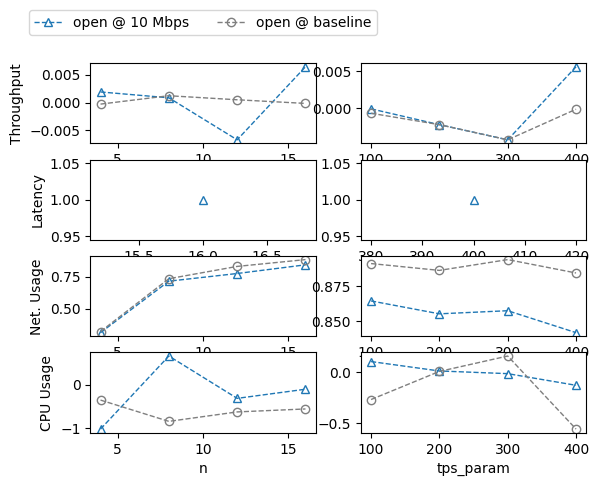

In [26]:
x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sg.loc[df_sg['algo'] != 'bhs']

bhs = df_sg[df_sg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc.columns = df_cc.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_cc.loc[:, (y_col, 'delta')] = (
        df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    ) / df_cc[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc.loc[:, (y_col, 'delta')] = -df_cc.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc.sort_index(axis=1, level=0, inplace=True)
df_cc = df_cc.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rg.loc[df_rg['algo'] != 'bhs']

bhs = df_rg[df_rg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_cc2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_cc2.columns = df_cc2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_cc2.loc[:, (y_col, 'delta')] = (
        df_cc2[y_col]['bhs'] - df_cc2[y_col]['iq']
    ) / df_cc2[y_col]['iq']
    if y_col != 'tput_mean':
        df_cc2.loc[:, (y_col, 'delta')] = -df_cc2.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_cc2.sort_index(axis=1, level=0, inplace=True)
df_cc2 = df_cc2.unstack(-1)

x_col = 'n'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['n', 'Name']
df_others = df_sbg.loc[df_sbg['algo'] != 'bhs']

bhs = df_sbg[df_sbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb.columns = df_ccb.columns.swaplevel(0, 1)
for y_col in y_cols:
    # df_cc.loc[:, (y_col, 'delta')] = df_cc[y_col]['bhs'] - df_cc[y_col]['iq']
    df_ccb.loc[:, (y_col, 'delta')] = (
        df_ccb[y_col]['bhs'] - df_ccb[y_col]['iq']
    ) / df_ccb[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb.loc[:, (y_col, 'delta')] = -df_ccb.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb.sort_index(axis=1, level=0, inplace=True)
df_ccb = df_ccb.unstack(-1)

x_col = 'tps_param'
y_cols = ['tput_mean', 'lat_mean', 'neto_mean', 'cpu_max_avg']
groupby_cols = ['tps_param', 'Name']
df_others = df_rbg.loc[df_rbg['algo'] != 'bhs']

bhs = df_rbg[df_rbg['algo'] == 'bhs'].set_index(groupby_cols)[y_cols]
iq = df_others.groupby(groupby_cols).agg(
    tput_mean=('tput_mean', 'max'),
    lat_mean=('lat_mean', 'min'),
    neto_mean=('neto_mean', 'min'),
    cpu_max_avg=('cpu_max_avg', 'min'),
)[y_cols]
df_ccb2 = pd.concat([iq, bhs], axis=1, keys=['iq', 'bhs'], join="inner")
df_ccb2.columns = df_ccb2.columns.swaplevel(0, 1)
for y_col in y_cols:
    df_ccb2.loc[:, (y_col, 'delta')] = (
        df_ccb2[y_col]['bhs'] - df_ccb2[y_col]['iq']
    ) / df_ccb2[y_col]['iq']
    if y_col != 'tput_mean':
        df_ccb2.loc[:, (y_col, 'delta')] = -df_ccb2.loc[:, (y_col, 'delta')]
    # df_cc.drop(columns=(y_col, 'bhs'), inplace=True)
    # df_cc.drop(columns=(y_col, 'iq'), inplace=True)
df_ccb2.sort_index(axis=1, level=0, inplace=True)
df_ccb2 = df_ccb2.unstack(-1)

fig, axs = plt.subplots(4, 2)
for i, y_col in enumerate(y_cols):
    for txn in ['query']:
        df_cc[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            ylabel=TO_TITLE[y_col],
            **({**designs['type']['bw'], **designs['Name'][txn]})
        )
        df_cc2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['bw'], **designs['Name'][txn]})
        )
        df_ccb[y_col]['delta'][txn].plot.line(
            ax=axs[i][0], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
        df_ccb2[y_col]['delta'][txn].plot.line(
            ax=axs[i][1], legend=False, linewidth=1,
            markerfacecolor='none',
            **({**designs['type']['baseline'], **designs['Name'][txn]})
        )
axs[0][0].legend([
    'open @ 10 Mbps',
    'open @ baseline',
    'trans. @ 10 Mbps',
    'trans. @ baseline',
], loc='upper center', bbox_to_anchor=(0.5,1.75), ncol=2)

In [27]:
df_cc

cpu_max_avg                                                           
             bhs                      delta                           iq   
Name        open   query transfer      open     query  transfer     open   
n                                                                          
4        113.821  70.991  130.707 -0.200757 -1.021729 -0.184015   94.791  \
8        125.536  22.714  136.188 -0.141496  0.659476 -0.193867  109.975   
12       131.931  27.047  135.161 -0.109447 -0.314940 -0.179364  118.916   
16       133.032  29.422  133.595 -0.117831 -0.104512  0.030332  119.009   

                      lat_mean  ... neto_mean tput_mean                    
                           bhs  ...        iq       bhs                    
Name   query transfer     open  ...  transfer      open   query transfer   
n                               ...                                        
4     35.114  110.393    2.649  ...    14.474    227.66  399.51   251.39  \
8     66.703  114.073    2.716  ...    39.402    220.59  396.73   211.34   
12    20.569  114.605    4.573  ...    93.440    163.72  395.07   156.50   
16    26.638  137.774    6.115  ...   163.747    134.27  397.65   125.60   

                                                             
         delta                          iq                   
Name      open     query  transfer    open   query transfer  
n                                                            
4    -0.079604  0.001906  0.010979  247.35  398.75   248.66  
8    -0.113206  0.000858 -0.036297  248.75  396.39   219.30  
12    0.067832 -0.006688  0.178997  153.32  397.73   132.74  
16    0.207464  0.006429  0.254871  111.20  395.11   100.09  

[4 rows x 36 columns]

In [28]:
df_cc2

cpu_max_avg                                                    
                  bhs                        delta                       
Name             open    query  transfer      open     query  transfer   
tps_param                                                                
100           118.233  26.8690  114.3440 -0.097565  0.102542 -0.134984  \
200           127.731  26.3910  126.2330 -0.106327  0.010387 -0.035452   
300           137.738  24.8550  137.8880 -0.012765 -0.015858 -0.012512   
400           130.345  30.2575  128.2325 -0.144155 -0.130013  0.053032   

                                         lat_mean  ... neto_mean tput_mean   
                 iq                           bhs  ...        iq       bhs   
Name           open     query   transfer     open  ...  transfer      open   
tps_param                                          ...                       
100        107.7230  29.93900  100.74500  2.28600  ...  214.5100   90.7100  \
200        115.4550  26.66800  121.91100  5.23700  ...  185.1100  119.8200   
300        136.0020  24.46700  136.18400  6.08100  ...  181.7290  127.2400   
400        113.9225  26.77625  135.41375  6.07875  ...  159.4025  134.9125   

                                                                       
                                 delta                            iq   
Name          query transfer      open     query  transfer      open   
tps_param                                                              
100        100.3600   87.800  0.037872 -0.000100 -0.000910   87.4000  \
200        199.4900  111.160  0.151783 -0.002251  0.210366  104.0300   
300        297.9900  113.280  0.206982 -0.004310  0.244425  105.4200   
400        397.6625  125.125  0.184872  0.005627  0.213628  113.8625   

                              
                              
Name          query transfer  
tps_param                     
100        100.3700    87.88  
200        199.9400    91.84  
300        299.2800    91.03  
400        395.4375   103.10  

[4 rows x 36 columns]